## $$\text{Análisis de las componentes principales}$$

Objetivo: Reducir el número de columnas de un datasets para hacer que los algoritmo reduzcan el tiempo de entrenamiento.

**Paso 1:** Aplicar escalado de variables a la matriz de características X, formada por m variables independientes.

**Paso 2:** Calcular la matriz de covarianzas de las m variables independientes de X.

**Paso 3:** Calcular los valores y vectores propios de la matriz de covarianzas.

**Paso 4:** Elegir un porcentaje P de varianza exlicada y elegir p <= m valores propios más grandes tales que:
$$\frac{\sum_{j=1}^p{\gamma_j}}{\sum_{i=1}^m{\gamma_i}} >= P$$

**Paso 5:** Los p vectores propios asociados a estos p valores más grandes son las componentes principales.
El espacio m-dimensional del dataset original se proyecta al nuevo subespacio p-dimensional de características, aplicando la matriz de proyecciones (que tiene los p vectores propios por columnas).

Más info: [aquí](https://setosa.io/ev/principal-component-analysis/)

In [2]:
import pandas as pd 
import numpy as np

In [3]:
dataset = pd.read_csv('./data/Wine.csv')

print(dataset.columns)
dataset.shape

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')


(178, 14)

In [4]:
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=0,test_size=0.2)

### Escalado de variables

In [5]:
from sklearn.preprocessing import StandardScaler 

scx = StandardScaler()
xtrain = scx.fit_transform(xtrain)
xtest = scx.transform(xtest)

### Reducimos la dimensionalidad con ACP

In [6]:
from sklearn.decomposition import PCA 
# máxima varianza posible
# pca = PCA(n_components=None)

pca = PCA(n_components=2)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36884109, 0.19318394])

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [8]:
ypred = classifier.predict(xtest)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

### Representación visual

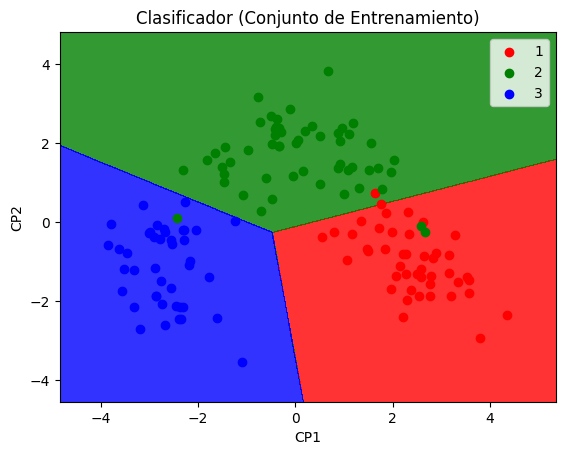

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = xtrain, ytrain
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.8, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()